In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import micasense.plotutils as plotutils
import micasense.metadata as metadata
import glob
import micasense.capture as capture
import numpy as np
import time
import micasense.imageutils as imageutils
import micasense.imageset as imageset
from pathlib import Path

In [2]:
root_path = Path("/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment")

In [3]:
outpath = root_path / "calibrated"

In [25]:
panelNamesBefore = list(root_path.glob("IMG_0000_*.tif"))

In [26]:
panelNamesBefore = [x.as_posix() for x in panelNamesBefore]
panelNamesBefore

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0000_7.tif']

In [27]:
panelCapBefore = capture.Capture.from_filelist(panelNamesBefore)
panelCapBefore

In [28]:
cam_model = panelCapBefore.camera_model
cam_serial = panelCapBefore.camera_serial

In [8]:
panelNamesAfter= list(root_path.glob("IMG_0426_*.tif"))

In [9]:
panelNamesAfter = [x.as_posix() for x in panelNamesAfter]
panelNamesAfter

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0426_7.tif']

In [10]:
panelNamesAfter = capture.Capture.from_filelist(panelNamesAfter)

In [14]:
imageNames = list(root_path.glob("IMG_*.tif"))
imageNames = imageNames[7:14]
imageNames = [x.as_posix() for x in imageNames]

In [15]:
imageNames

['/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_1.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_2.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_3.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_4.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_5.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_6.tif',
 '/mnt/d/dancejod/imageprocessing_altumPT/data/altum-pt-alignment/IMG_0001_7.tif']

In [16]:
thecapture = capture.Capture.from_filelist(imageNames)

Manual values from the panel

In [22]:
altumPT_reflectance_by_band = [0.508, 0.509, 0.509, 0.509, 0.506, 0.5]

In [29]:
panel_irradiance_before = panelCapBefore.panel_irradiance(altumPT_reflectance_by_band)

In [30]:
irradiance_list = panel_irradiance_before + [0]

In [36]:
refl = thecapture.reflectance(irradiance_list)

In [32]:
panel_irradiance_before

[6156.977013561354,
 7112.767570018946,
 2551.6448064566684,
 3082.948073292873,
 1827.1682229489768,
 41643.74831061201]

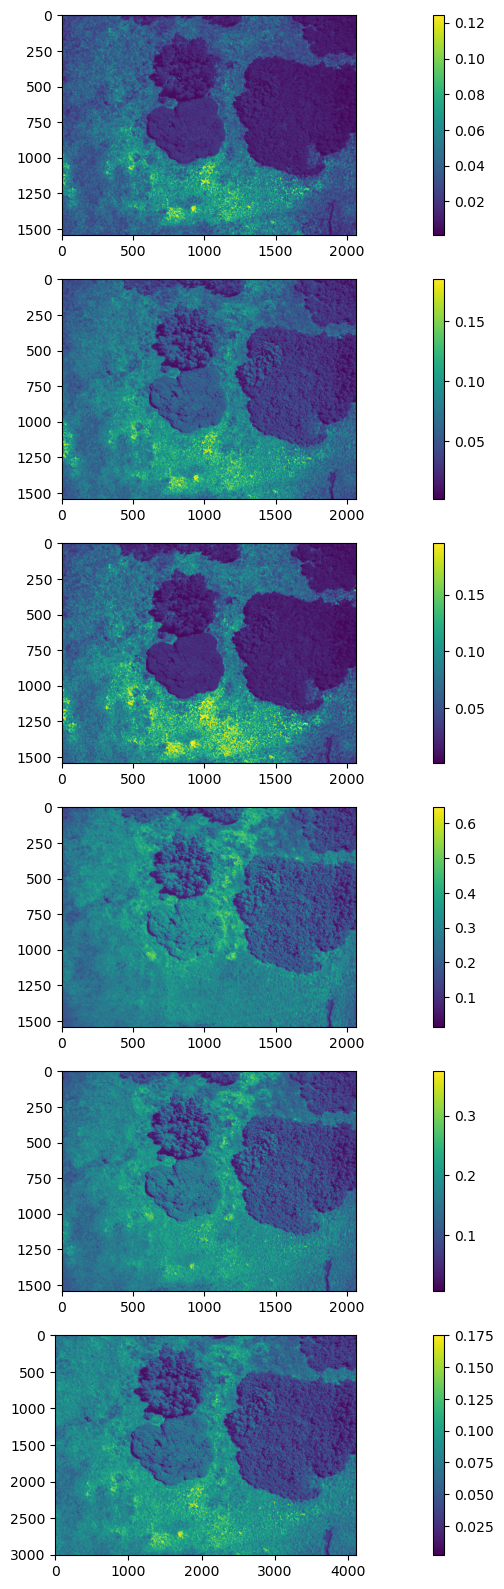

In [43]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(refl[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

In [45]:
panel_irradiance_after = panelNamesAfter.panel_irradiance(altumPT_reflectance_by_band)

In [46]:
irradiance_list_After = panel_irradiance_after + [0]
reflAfter = thecapture.reflectance(irradiance_list_After)

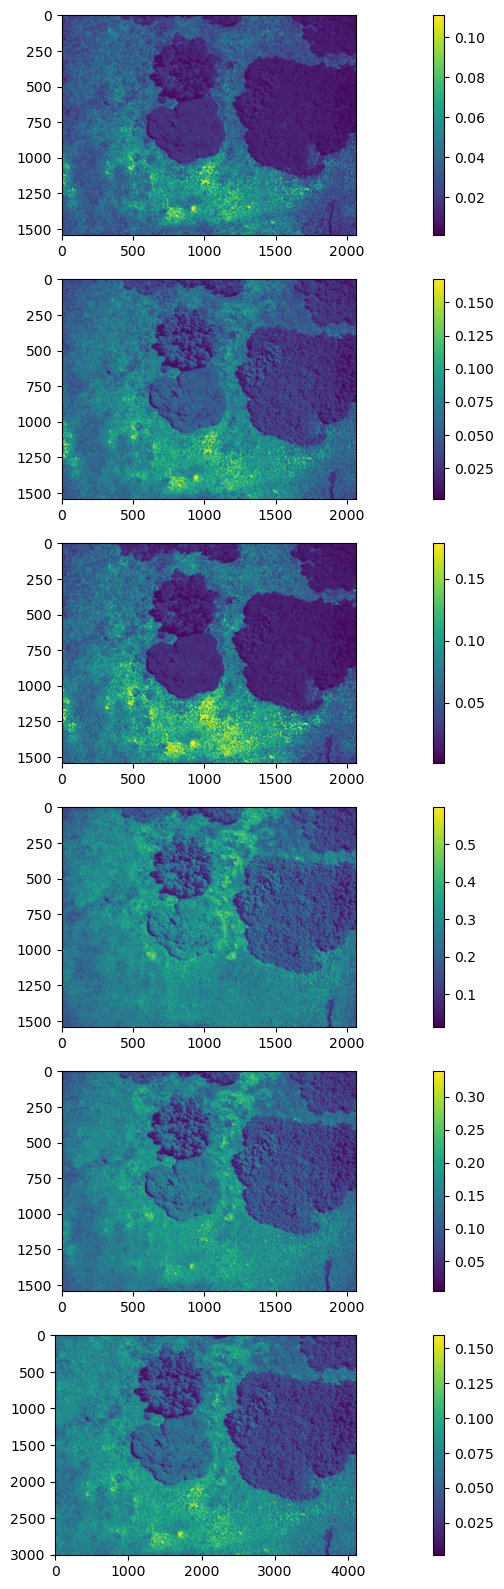

In [47]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(reflAfter[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

#### DLS addition

In [48]:
import math

In [52]:
panelCapBefore.panel_radiance()

[995.5919394308485,
 1152.4086959532244,
 413.4168078736636,
 499.4984208130791,
 294.2924887972771,
 6627.808392508668]

In [53]:
import micasense.dls as dls

In [55]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 ) = dls.compute_sun_angle(thecapture.location(), thecapture.dls_pose(), thecapture.utc_time(), np.array([0,0,-1]))

In [56]:
(sun_vector, sensor_vector, sun_sensor_angle, solar_elevation, solar_azimuth
 )

(array([-0.38784543,  0.39900705, -0.83088465]),
 array([-0.0442714 , -0.02154025, -0.99878729]),
 0.5763584099988815,
 0.9806956220863379,
 2.3420102877908477)

In [57]:
fresnel_corr = dls.fresnel(sun_sensor_angle)

In [66]:
dls_irradiances = []
cwavelengths = []
dir_dif_ratio = 6.0
for img in thecapture.images:
    percent_diffuse = 1.0/dir_dif_ratio
    sensor_irradiance = img.spectral_irradiance / fresnel_corr
    untilted_dirrect_irr = sensor_irradiance / (percent_diffuse + np.cos(sun_sensor_angle))
    dls_irr = untilted_dirrect_irr*(percent_diffuse + np.sin(solar_elevation))
    dls_irradiances.append(dls_irr)
    cwavelengths.append(img.center_wavelength)

In [67]:
cwavelengths

[475, 560, 668, 842, 717, 634.5, 11000]

In [68]:
dls_irradiances

[1.0894167288012968,
 1.0029641046516842,
 0.8915241818094788,
 0.5192849554726121,
 0.6781934192683199,
 0.8080396094514066,
 0.0]

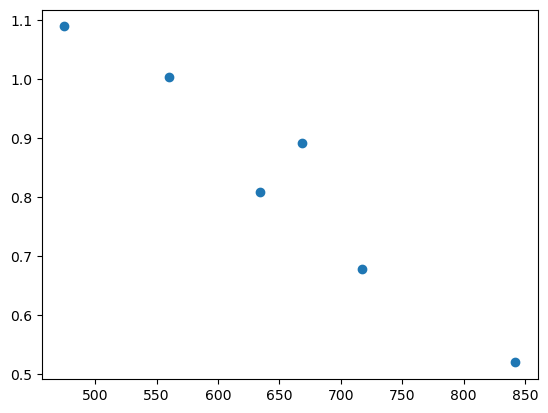

In [69]:
plt.scatter(cwavelengths[:-1], dls_irradiances[:-1])

In [71]:
panelBefore_radiances = np.array(panelCapBefore.panel_radiance())

In [72]:
irr_from_panel = math.pi * panelBefore_radiances/altumPT_reflectance_by_band

In [74]:
dls_correction = irr_from_panel/dls_irradiances[:-1]

In [75]:
dls_correction

array([ 5651.6270136 ,  7091.74689007,  2862.1150817 ,  5936.91005449,
        2694.16979144, 51536.76604899])

In [76]:
dls_irradiances

[1.0894167288012968,
 1.0029641046516842,
 0.8915241818094788,
 0.5192849554726121,
 0.6781934192683199,
 0.8080396094514066,
 0.0]

In [78]:
dls_refl = thecapture.reflectance(dls_irradiances[:-1]*dls_correction)

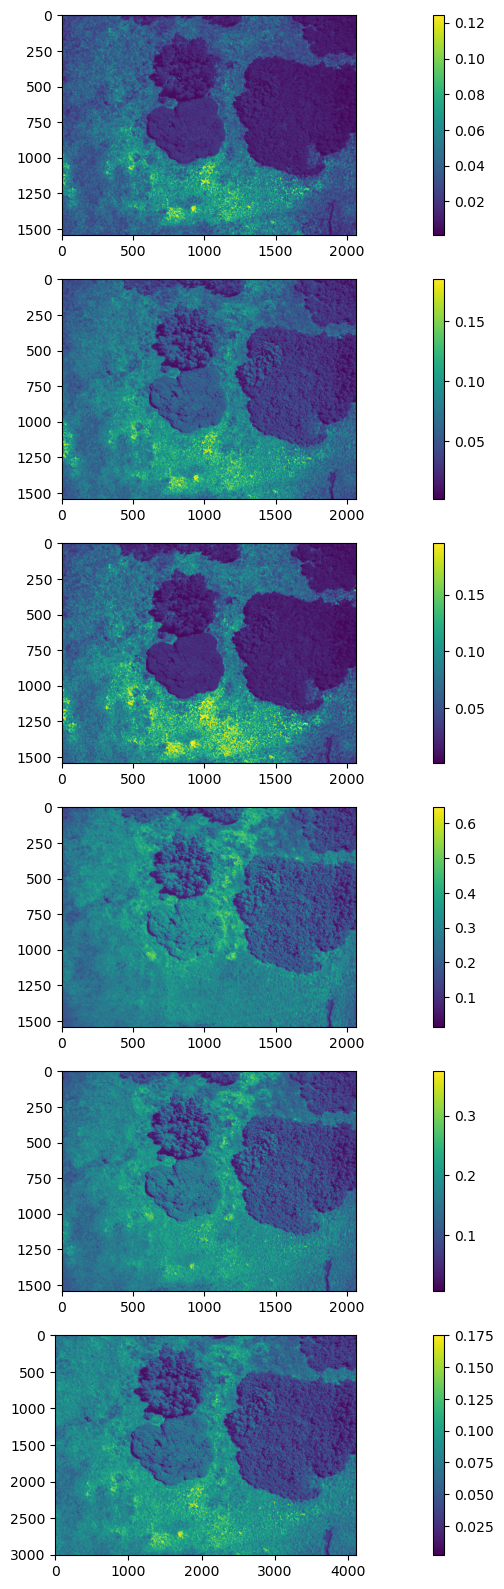

In [79]:
fig, axs = plt.subplots(6, figsize=(20,20))
for b in range(6):
    img = axs[b].imshow(dls_refl[b])
    cbar = fig.colorbar(img, ax=axs[b])
    #fig.colorbar(axs[b])

todo:
- interpolate between the panels
- apply dls correction